In [242]:
import numpy as np
from sklearn.feature_extraction import image
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from skimage import exposure, filters, feature
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
from common.img_data_functions import read_image
from copy import copy
from mpl_toolkits.mplot3d import Axes3D

### Load Image

In [5]:
(image_array_rgb, image_array_grey,
 image_array_luv) = read_image('../data/images/BUILDING/100477852@N05_22334842890.jpg')

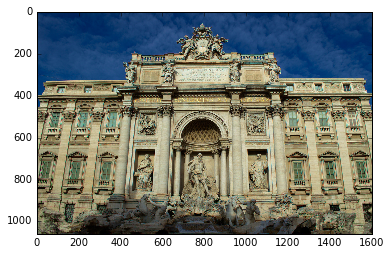

In [10]:
plt.imshow(image_array_rgb)
plt.show()

### MEASURE CRISPNESS

In [14]:
image_array_grey_scaled = image_array_grey/255
image_array_rgb_scaled = image_array_rgb/255

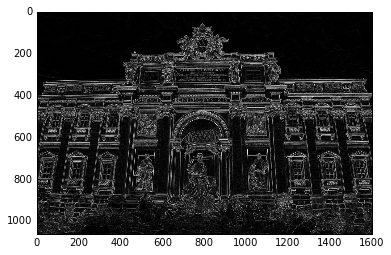

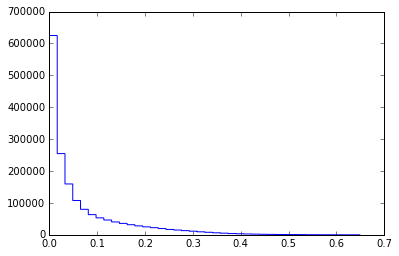

In [15]:
test = filters.sobel(image_array_grey_scaled)
plt.imshow(test, cmap="Greys_r")
plt.show()
test.var()
plt.hist(test.flatten(), bins=40, histtype='step')
plt.show()

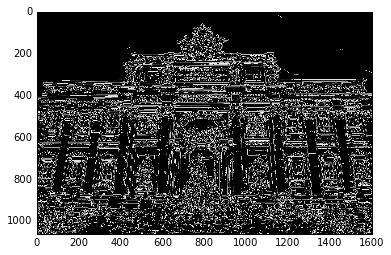

0.182244033014


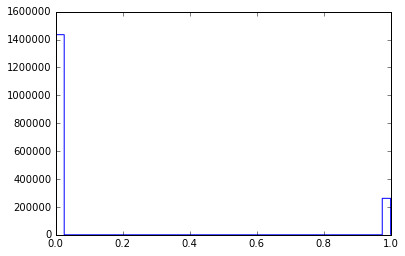

In [18]:
test2 = feature.canny(image_array_grey_scaled, sigma=1)
plt.imshow(test2, cmap="Greys_r")
plt.show()
print np.sum(test2 == True)/float(np.sum(test2 == False))
plt.hist(test2.flatten(), bins=40, histtype='step')
plt.show()

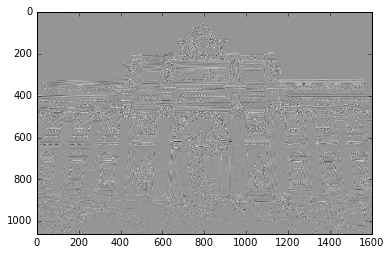

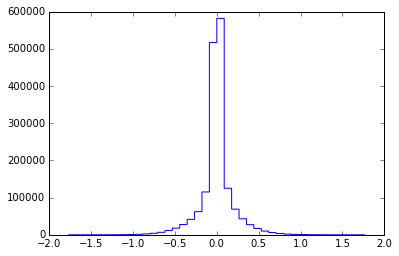

In [19]:
test5 = filters.laplace(image_array_grey_scaled, ksize=3)
plt.imshow(test5, cmap="Greys_r")
plt.show()
test5.var()
plt.hist(test5.flatten(), bins=40, histtype='step')
plt.show()

### DETERMINE COLOR CENTERS

In [150]:
def find_dominant_colors(color_array, num_colors):
    """
    Find the [num_colors] dominant colors in an RGB immage using KMeans cluter.

    INPUTS:
    color_array | A 3D Numpy Array of the RGB channels.
    num_colors | Number of color centers to return.

    OUTPUTS:
    dom_colors | A 2D Numpy Array of the dominant RGB colors with shape:
                 [num_colors, 3]
    """
    X = np.concatenate((color_array[:, :, 0].flatten().reshape((-1, 1)),
                        color_array[:, :, 1].flatten().reshape((-1, 1)),
                        color_array[:, :, 2].flatten().reshape((-1, 1))),
                       axis=1)
    model = KMeans(n_clusters=num_colors, n_jobs=20, n_init=4)
    X_out = model.fit_predict(X)
    return model, X_out

In [151]:
dims = image_array_rgb.shape

In [222]:
color_model, X_out = find_dominant_colors(image_array_rgb, 5)

In [223]:
X_out

array([1, 1, 1, ..., 4, 2, 2], dtype=int32)

In [224]:
centers = color_model.cluster_centers_.round()
cluster_colors_out = centers[X_out]
new_pic = cluster_colors_out.reshape(dims)
a = 255 - copy(new_pic[:,:,0])
b = 255 - copy(new_pic[:,:,1])
c = 255 - copy(new_pic[:,:,2])

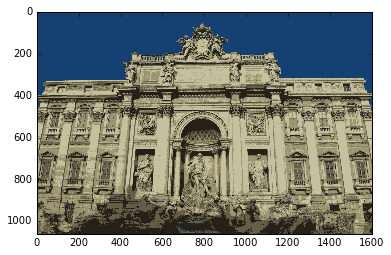

In [225]:
new_pic[:,:,0] = a
new_pic[:,:,1] = b
new_pic[:,:,2] = c
plt.imshow(new_pic)
plt.show()

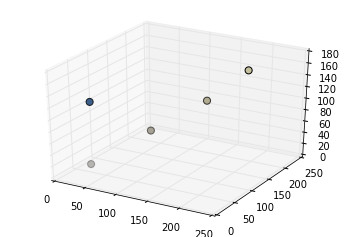

In [241]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, xs=centers[:,0], ys=centers[:,1], zs=centers[:,2], zdir='z', s=50, c=centers/255, depthshade=True)

In [232]:
centers[:,0]

array([ 156.,   19.,   38.,  196.,   99.])

### FIND COLOR DISTRIBUTIONS

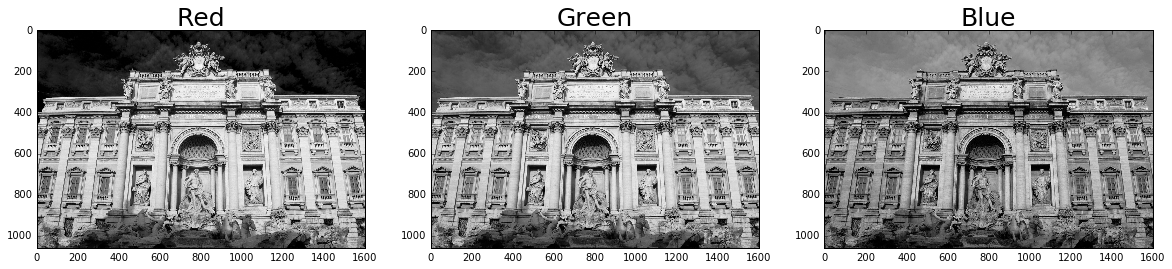

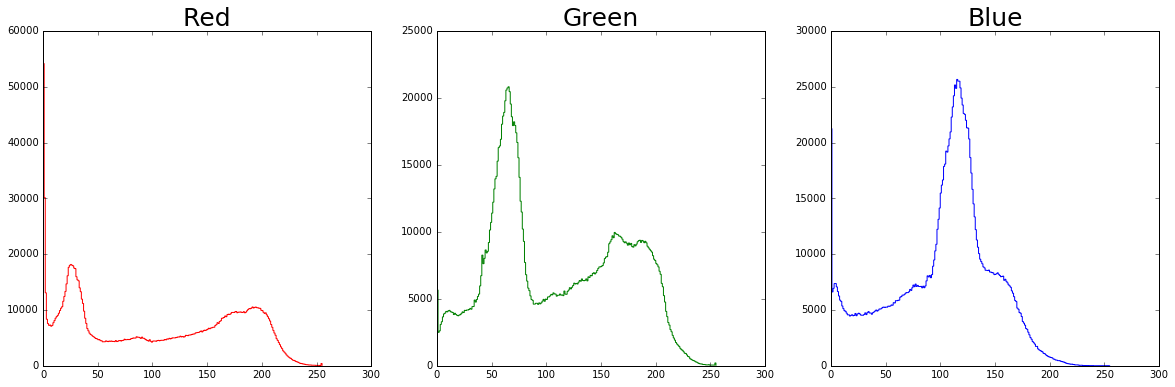

In [171]:
red = image_array_rgb[:,:,0].astype(int)
green = image_array_rgb[:,:,1].astype(int)
blue = image_array_rgb[:,:,2].astype(int)


f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 20)
ax1.imshow(red, cmap="Greys_r")
ax2.imshow(green, cmap="Greys_r")
ax3.imshow(blue, cmap="Greys_r")
ax1.set_title("Red", fontdict={'fontsize':25})
ax2.set_title("Green", fontdict={'fontsize':25})
ax3.set_title("Blue", fontdict={'fontsize':25})
plt.show()
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 6)
ax1.hist(red.flatten(), bins=255, color='r', histtype='step')
ax2.hist(green.flatten(), bins=255, color='g', histtype='step')
ax3.hist(blue.flatten(), bins=255, color='b', histtype='step')
ax1.set_title("Red", fontdict={'fontsize':25})
ax2.set_title("Green", fontdict={'fontsize':25})
ax3.set_title("Blue", fontdict={'fontsize':25})
#plt.legend(handles=[red_hist, blue_hist, green_hist])
plt.show()

### FIND BRIGHTNESS DISTRIBUTIONS

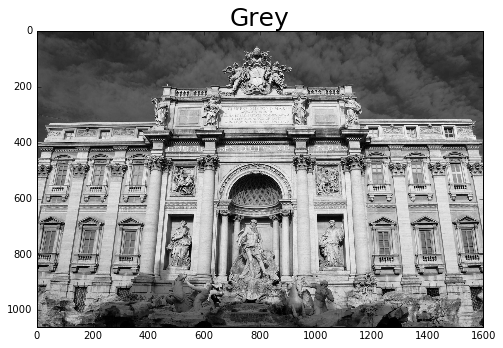

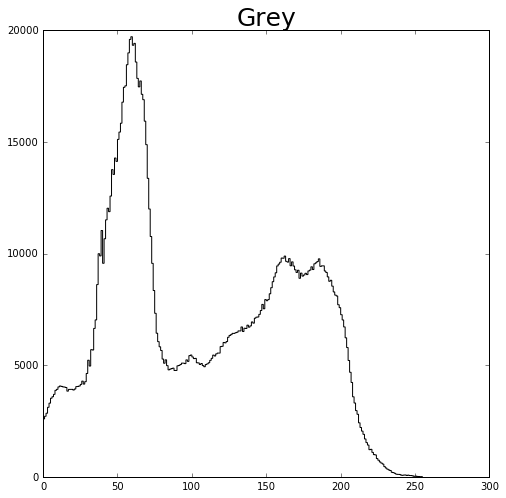

In [174]:
grey = image_array_grey.astype(int)

plt.figure(figsize=(8, 8))
plt.imshow(grey, cmap="Greys_r")
plt.title("Grey", fontdict={'fontsize':25})
plt.show()
plt.figure(figsize=(8, 8))
plt.hist(grey.flatten(), bins=255, color='k', histtype='step')
plt.title("Grey", fontdict={'fontsize':25})